In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

### Feature selection from Bag-of-Words features of Author node using most frequent occurences

In [3]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)[:50]

    colsum_df = pd.DataFrame(col_sum)
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))

    imp_feat = X[index_list]
   
    return imp_feat.iloc[:, : 50]

In [4]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,1,9,10,13,14,15,22,23,44,63,...,253,258,293,295,296,304,313,321,326,329
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,9,10,11,15,19,23,35,39,63,64,...,285,293,295,302,304,313,314,321,324,329
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,9,10,11,15,21,23,25,31,35,54,...,253,256,273,287,295,296,300,303,304,308
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)
X = class3
imp_feat3 = get_selected_features(class3)
imp_feat3.head()

,11,15,21,23,35,39,57,63,81,82,...,258,290,295,296,301,302,307,320,321,324
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [8]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/dblp/frequency/'

In [9]:
sampled0  = pd.DataFrame(torch.load(class_path + 'author0_50feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,1,0,0,0,1,1,1,1,...,1,1,1,1,1,0,0,1,1,0
1,1,0,1,1,1,0,1,0,1,1,...,1,0,1,0,1,1,0,0,0,0
2,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,0,0,1,1,1,0
3,0,1,1,1,0,0,0,1,1,0,...,1,0,0,0,1,1,0,1,1,1
4,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0


In [10]:
sampled1  = pd.DataFrame(torch.load(class_path + 'author1_50feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,1,0,0,1,1,1,0,1,1,1,...,0,1,1,0,1,1,0,0,1,0
2,0,0,1,0,1,0,1,1,1,1,...,1,0,1,0,1,0,1,1,0,0
3,0,1,0,1,1,1,0,1,0,0,...,0,1,1,0,1,0,1,1,0,0
4,0,1,1,0,0,0,1,1,1,1,...,0,0,1,1,1,0,0,1,0,0


In [11]:
sampled2  = pd.DataFrame(torch.load(class_path + 'author2_50feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,1,0,1,1,1,1,1,...,0,1,1,1,0,0,1,0,1,1
1,0,0,0,1,1,0,1,0,1,0,...,1,0,0,1,0,1,1,1,1,1
2,0,1,1,0,0,1,0,0,1,1,...,1,1,0,0,1,1,1,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,1,1,0,1,1,0


In [12]:
sampled3  = pd.DataFrame(torch.load(class_path + 'author3_50feat.pt').cpu().numpy())
sampled3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,1,0,0,1,0,0,1,0,...,0,1,1,1,0,1,0,1,1,0
1,1,1,1,0,0,1,1,0,1,1,...,0,1,1,0,0,1,1,1,0,1
2,1,1,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,1,1
3,1,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0
4,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,1,1,1,1,1


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [14]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.25819889, 0.29488391, 0.2773501 , ..., 0.        , 0.14142136,
        0.13363062],
       [0.41403934, 0.31524416, 0.22237479, ..., 0.30237158, 0.30237158,
        0.28571429],
       [0.32274861, 0.29488391, 0.2773501 , ..., 0.35355339, 0.35355339,
        0.26726124],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12909944, 0.14744196, 0.13867505, ..., 0.14142136, 0.28284271,
        0.13363062]])

In [15]:
sns.set(font_scale=1.4)

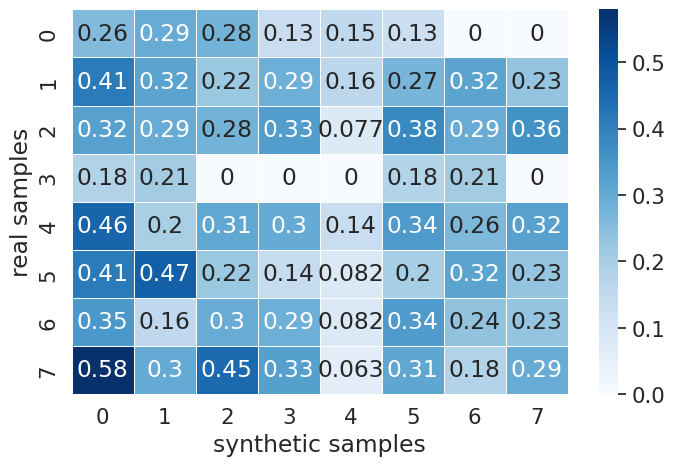

In [16]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [17]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.2363558612882018

Author class 1

In [18]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.26726124, 0.        , ..., 0.26726124, 0.25400025,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24120908, 0.45584231, 0.34815531, ..., 0.34188173, 0.37907125,
        0.25712974],
       ...,
       [0.        , 0.26726124, 0.27216553, ..., 0.13363062, 0.12700013,
        0.15075567],
       [0.        , 0.18898224, 0.19245009, ..., 0.        , 0.        ,
        0.        ],
       [0.17888544, 0.16903085, 0.34426519, ..., 0.25354628, 0.32128773,
        0.28603878]])

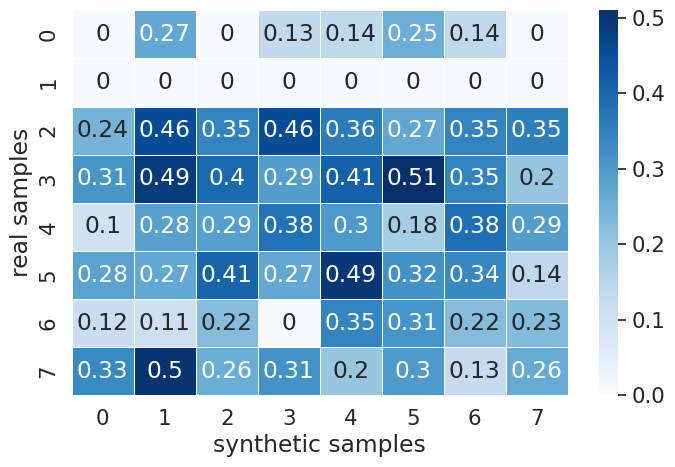

In [19]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [20]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.23840684871421408

Author class 2

In [21]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.19802951, 0.20739034, 0.21442251, ..., 0.33968311, 0.23094011,
        0.34641016],
       [0.36380344, 0.38100038, 0.26261287, ..., 0.13867505, 0.28284271,
        0.28284271],
       [0.52549385, 0.46566713, 0.48145692, ..., 0.46225016, 0.51854497,
        0.42426407],
       ...,
       [0.24253563, 0.12700013, 0.13130643, ..., 0.        , 0.14142136,
        0.        ],
       [0.19802951, 0.20739034, 0.32163376, ..., 0.        , 0.23094011,
        0.11547005],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

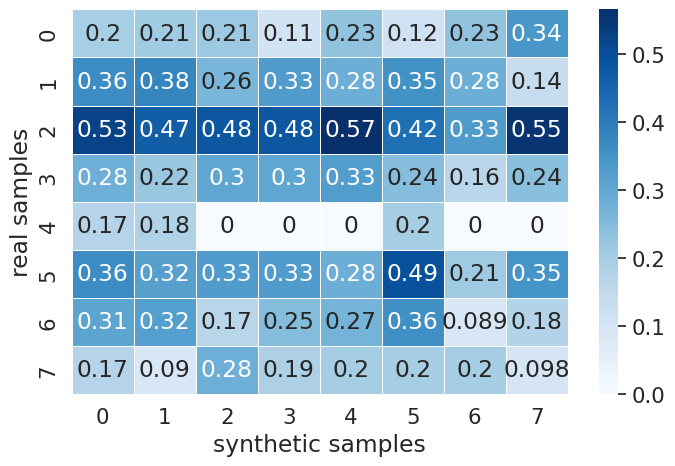

In [22]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [23]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.1912586952628634

Author class 3

In [24]:
real_class3 = np.array(imp_feat3)
cosine_sim(real_class3,sampled3)

array([[0.13608276, 0.14142136, 0.15075567, ..., 0.        , 0.27216553,
        0.2773501 ],
       [0.25819889, 0.35777088, 0.28603878, ..., 0.24494897, 0.25819889,
        0.1754116 ],
       [0.24343225, 0.18973666, 0.20225996, ..., 0.34641016, 0.18257419,
        0.24806947],
       ...,
       [0.19245009, 0.2       , 0.21320072, ..., 0.18257419, 0.        ,
        0.19611614],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

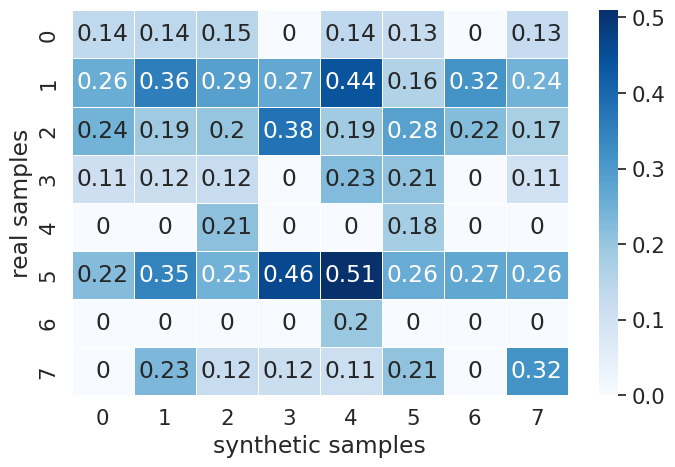

In [25]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [26]:
avg_cossim_class3 = np.mean(cosine_sim(real_class3,sampled3))
avg_cossim_class3

0.21426429929824004

In [27]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2 + avg_cossim_class3)/4

0.22007142614087982